In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [18]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,0.5,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0.756519,0.123426,0.156010,0.397855,0.689124,0.822287,0.059486,0.032697,0.175249,0.673825
1,0.5,0.5,0.0,0.0,0.0,0,0,0,0,0,...,0.416175,0.688381,0.876422,0.153659,0.406306,0.714781,0.452631,0.890333,0.495503,0.194227
2,0.5,0.5,0.5,0.0,0.0,0,0,0,0,0,...,0.400526,0.012098,0.391870,0.681438,0.714112,0.587022,0.997617,0.179406,0.094149,0.551203
3,0.5,0.5,0.5,0.5,0.0,0,0,0,0,0,...,0.153326,0.399814,0.843777,0.106176,0.125045,0.765685,0.582473,0.797105,0.886579,0.486906
4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,...,0.569110,0.288521,0.049904,0.312614,0.213312,0.666463,0.798311,0.552320,0.399732,0.078480


In [3]:
waypoints = pd.read_csv('waypoints.csv', index_col=0)
waypoints.head()

,0,1
perfect_middle_noise0_iter0,0.00,0
middle0_00_noise0_iter0,0.01,0
middle0_01_noise0_iter0,0.02,0
middle0_02_noise0_iter0,0.03,0
middle0_03_noise0_iter0,0.04,0


In [6]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,Unnamed: 0,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,0,1,2,3
0,0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [7]:
import bonvoyage

In [21]:
bonvoyage.waypointplot??

In [22]:
bonvoyage.visualize._waypoint_scatter??

In [13]:
plot_kinds = 'scatter', 'hex'

In [23]:
folder

'pdf'

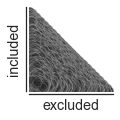

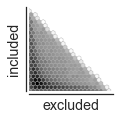

In [25]:

for kind in plot_kinds:
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    if kind == 'scatter':
        kwargs = {'rasterized': True}
    else:
        kwargs = {}
    
    bonvoyage.waypointplot(waypoints, kind=kind, **kwargs)
    fig.savefig('{}/waypoints_all_{}.pdf'.format(folder, kind), dpi=300)

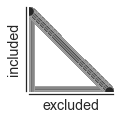

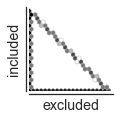

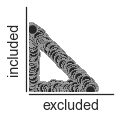

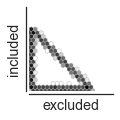

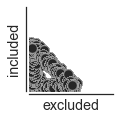

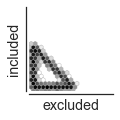

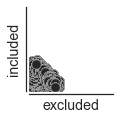

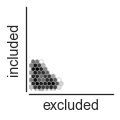

In [26]:
noise_percentages = 0, 25, 50, 75

for noise_percentage in noise_percentages:
    
    rows = metadata['% Noise'] == noise_percentage
    feature_ids = metadata.loc[rows, 'Feature ID']
    
    waypoints_subset = waypoints.loc[feature_ids]
    for kind in plot_kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = {'rasterized': True} if kind == 'scatter' else {}
        
        bonvoyage.waypointplot(waypoints_subset, kind=kind, **kwargs)
        fig.savefig('{}/waypoints_noise{}_{}.pdf'.format(folder, noise_percentage, kind), dpi=300)

## Estimate modality and paint hte waypoints with modality colors

In [ ]:
import anchor

estimator = anchor.BayesianModalities()

modalities = estimator.fit_predict(data)
modalities.head()